<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

Ax = B </br>
x = (A^T * A)^-1 * A^T * b

In [0]:
sess = tf.Session()

In [0]:
x_val = np.linspace(0, 10, 100)
y_val = x_val + np.random.normal(0, 1, 100)

In [5]:
x_val.shape, y_val.shape

((100,), (100,))

In [0]:
x_val_column = np.transpose(np.matrix(x_val))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

A = np.column_stack((x_val_column, ones_column))
b = np.transpose(np.matrix(y_val))

In [12]:
A.shape, b.shape

((100, 2), (100, 1))

In [0]:
A_tf = tf.constant(A)
b_tf = tf.constant(b)

In [0]:
tA_A = tf.matmul(tf.transpose(A_tf), A_tf)
tA_A_inv = tf.matrix_inverse(tA_A)

In [0]:
product = tf.matmul(tA_A_inv, tf.transpose(A_tf))
solution = tf.matmul(product, b_tf)
solution_eval = sess.run(solution)

In [22]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope      : '+ str(slope))
print('y_intercept: '+ str(y_intercept))     

slope      : 1.011146050974958
y_intercept: 0.020722445191604905


In [0]:
best_fit = [ slope * i + y_intercept for i in x_val]

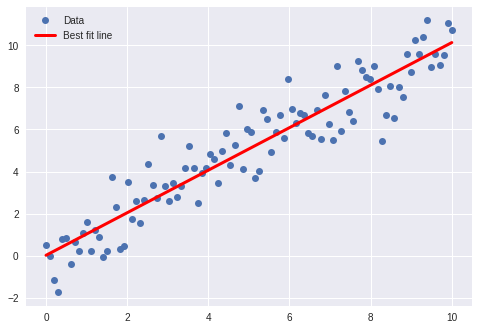

In [32]:
plt.plot(x_val, y_val, 'o', label='Data')
plt.plot(x_val, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend()
plt.show()

Cholesky decomposition


In [0]:
ops.reset_default_graph()
sess = tf.Session()

In [0]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))



In [0]:
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [0]:
A_tf = tf.constant(A)
b_tf = tf.constant(b)

In [0]:
tA_A = tf.matmul(tf.transpose(A_tf), A_tf)
L = tf.cholesky(tA_A)

In [0]:
tA_b = tf.matmul(tf.transpose(A_tf), b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [54]:
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope      : ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope      : 0.991154048716265
y_intercept: 0.013465625241697313


In [0]:
best_fit = [slope * i + y_intercept for i in x_vals]

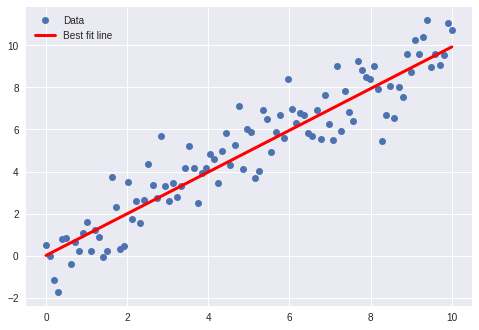

In [56]:
plt.plot(x_vals, y_val, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend()
plt.show()

irish

In [0]:
ops.reset_default_graph()
sess = tf.Session()

from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [0]:
x_vals = np.array([data[3] for data in iris.data ])
y_vals = np.array([data[0] for data in iris.data ])

In [0]:
lr = 0.05
batch_size = 25
epochs = 200

In [0]:
x = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [0]:
model_output = tf.add(tf.matmul(x, A), b)

In [0]:
loss = tf.reduce_mean(tf.square(y - model_output))

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(lr)
train_step = optimizer.minimize(loss)

In [12]:
loss_vec = []
for i in range(epochs):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
   
  feed_dict={x:rand_x, y:rand_y}
  
  sess.run(train_step, feed_dict=feed_dict)
  
  temp_loss = sess.run(loss, feed_dict=feed_dict)
  loss_vec.append(temp_loss)
  
  if (i + 1) % 25 == 0:
    print(str(i+1) + ' A=' + str(sess.run(A)) + " b=" +  str(sess.run(b)) + ' loss=' + str(temp_loss))

25 A=[[2.2425802]] b=[[2.7816868]] loss=1.1707635
50 A=[[1.6925929]] b=[[3.5353863]] loss=0.6073222
75 A=[[1.4061384]] b=[[4.1122603]] loss=0.34612647
100 A=[[1.1410023]] b=[[4.371985]] loss=0.2579483
125 A=[[1.0690628]] b=[[4.5360117]] loss=0.2302507
150 A=[[0.9494318]] b=[[4.619112]] loss=0.1917824
175 A=[[0.95702934]] b=[[4.71628]] loss=0.22591177
200 A=[[0.9216082]] b=[[4.743726]] loss=0.26691586


In [0]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = [slope * i + y_intercept for i in x_vals]

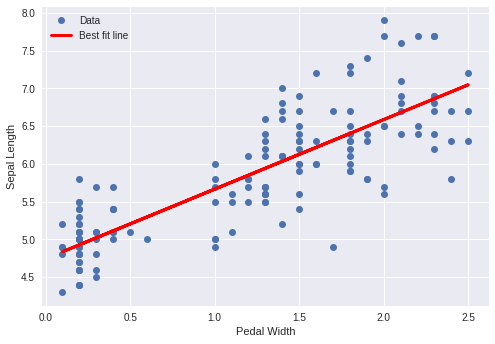

In [14]:
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

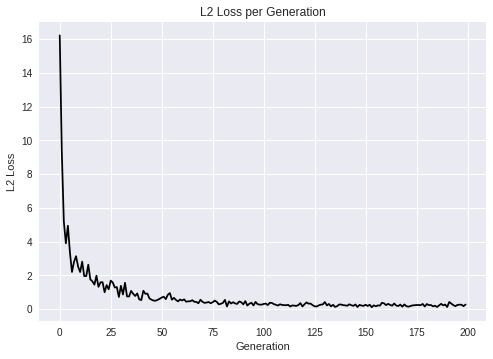

In [15]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()